In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#autorelaod
%load_ext autoreload
%autoreload 2
from eqcycles.io import HBILoader
from eqcycles.analysis.geometry import project_to_fault_trace
from eqcycles.vis.rupture_sequence import plot_rupture_sequence

In [3]:
loader = HBILoader('/export/dump/ymagen/NAF/hbi_sims_non_ovelaping/NAF_res_3.msh')

In [4]:
data = loader.load('/export/dump/ymagen/NAF/hbi_sims_non_ovelaping/output', 4)

In [10]:
project_to_fault_trace(data.coords, '/export/dump/ymagen/NAF/shapefiles/NAF_simplefied.shp')

array([  10.,    9.,   10., ..., 1262., 1262., 1262.], shape=(5768,))

(array([ 29., 195., 215.,  82.,  42.,  43.,  43.,  32.,   8.,  26.]),
 array([4.792  , 5.13009, 5.46818, 5.80627, 6.14436, 6.48245, 6.82054,
        7.15863, 7.49672, 7.83481, 8.1729 ]),
 <BarContainer object of 10 artists>)

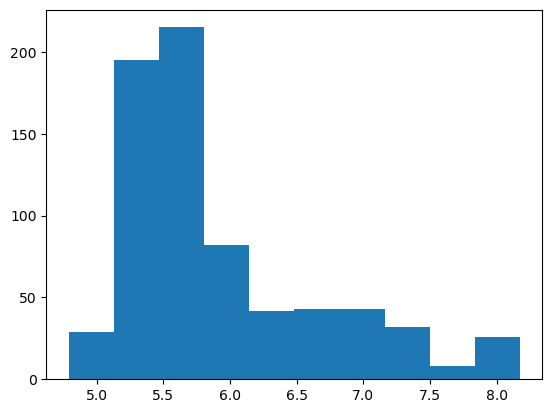

In [8]:
plt.hist(data.catalog.Mw)

In [9]:
fig  = plot_rupture_sequence(data, '/export/dump/ymagen/NAF/shapefiles/NAF_simplefied.shp', add_rupture_direction=True)

--> Processing Run for Rupture Sequence Plot...
1262.0 9.0
    Plotting region: x [0.0, 1262.0] km, time [0, 2600.00] years
  Analyzing Dir: Event 0 (Mw 8.2) at 150843135.04s
    Slope=-1.60e-01 s/m, R2=0.78, Code=-1, Est. Vel=-0.01 km/s


  Analyzing Dir: Event 1 (Mw 7.5) at 173969449.31s
    Slope=2.56e-01 s/m, R2=0.88, Code=1, Est. Vel=0.00 km/s
  Analyzing Dir: Event 2 (Mw 8.0) at 851756686.00s
    Slope=-2.78e-01 s/m, R2=0.92, Code=-1, Est. Vel=-0.00 km/s
  Analyzing Dir: Event 68 (Mw 8.0) at 5435259690.16s
    Slope=-6.89e-01 s/m, R2=0.74, Code=-1, Est. Vel=-0.00 km/s
  Analyzing Dir: Event 70 (Mw 7.9) at 6590699385.96s
    Slope=-1.11e+00 s/m, R2=0.96, Code=-1, Est. Vel=-0.00 km/s
  Analyzing Dir: Event 83 (Mw 8.0) at 10856513190.65s
    Slope=-1.53e+00 s/m, R2=0.36, Code=-1, Est. Vel=-0.00 km/s
  Analyzing Dir: Event 91 (Mw 7.9) at 12257576796.81s
    Slope=-9.28e-01 s/m, R2=0.99, Code=-1, Est. Vel=-0.00 km/s
  Analyzing Dir: Event 124 (Mw 8.0) at 16317674840.52s
    Slope=-5.21e+00 s/m, R2=0.23, Code=0, Est. Vel=-0.00 km/s
  Analyzing Dir: Event 138 (Mw 7.9) at 19032816227.38s
    Slope=6.15e-01 s/m, R2=0.57, Code=1, Est. Vel=0.00 km/s
  Analyzing Dir: Event 171 (Mw 8.0) at 21674749985.07s
    Slope=-7.72e+00 s/

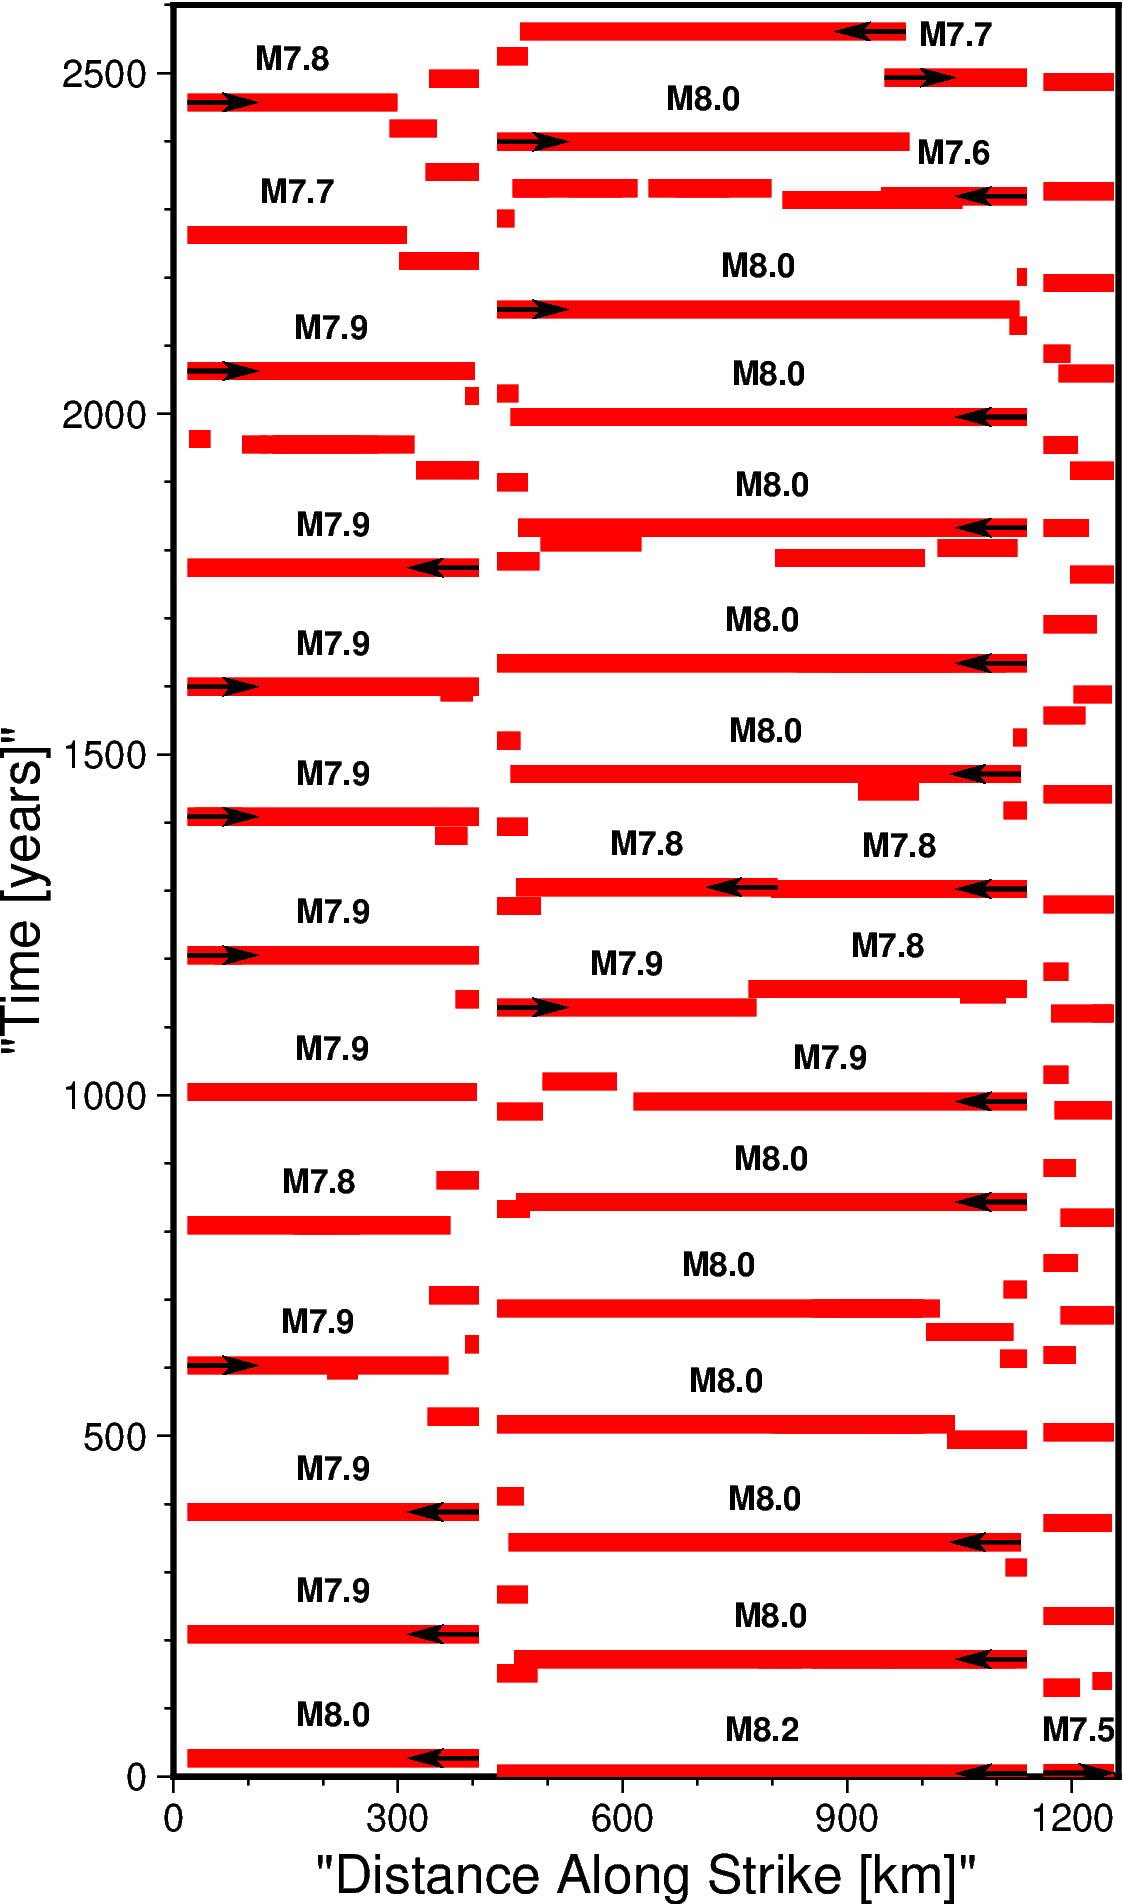

In [10]:
fig.show()

In [5]:
%load_ext line_profiler

In [6]:
# Profile the function
%lprun -f plot_rupture_sequence plot_rupture_sequence(data, '/export/dump/ymagen/NAF/shapefiles/NAF_simplefied.shp')

--> Processing Run for Rupture Sequence Plot...
1262.0 9.0
    Plotting region: x [0.0, 1262.0] km, time [0, 2600.00] years


Timer unit: 1e-09 s

Total time: 6.08168 s
File: /export/dump/ymagen/NAF/eqcycles/src/eqcycles/vis/rupture_sequence.py
Function: plot_rupture_sequence at line 21

Line #      Hits         Time  Per Hit   % Time  Line Contents
    21                                           def plot_rupture_sequence(
    22                                               sim_data: SimulationData,
    23                                               shapefile_path: str,
    24                                               output_path: str = None,
    25                                               config: Dict[str, Any] = None,
    26                                               fig: pygmt.Figure = None,
    27                                               add_rupture_direction: bool = False,
    28                                           ):
    29                                               """
    30                                               Generates a rupture sequence plot for a given simula

In [54]:
import eqcycles.vis.rupture_sequence as rs

# Get the path to the file
file_path = rs.__file__
if file_path.endswith('.pyc'):
    file_path = file_path[:-1]  # Change .pyc to .py

print(f"Reading file: {file_path}")

# Print lines 30 to 45
with open(file_path, 'r') as f:
    lines = f.readlines()
    for i in range(30, 45):
        # i is 0-indexed, so we print i+1 for the line number
        print(f"{i+1}: {lines[i].strip()}")

Reading file: /export/dump/ymagen/NAF/eqcycles/src/eqcycles/vis/rupture_sequence.py
31: 
32: Args:
33: sim_data (SimulationData): The loaded and standardized simulation data.
34: shapefile_path (str): Path to the reference fault trace shapefile.
35: output_path (str): The path to save the output PNG image.
36: config (Dict[str, Any], optional): A dictionary to override default plotting settings.
37: """
38: cfg = {**DEFAULT_CONFIG, **(config or {})}
39: 
40: print(f"--> Processing Run for Rupture Sequence Plot...")
41: 
42: # 1. Perform Geometric Analysis
43: # Project the mesh coordinates to the 1D fault trace
44: mesh_along_strike = project_to_fault_trace(sim_data.coords, shapefile_path)
45: print(np.max(mesh_along_strike), np.min(mesh_along_strike))


In [50]:
%load_ext snakeviz
%snakeviz plot_rupture_sequence(data, '/export/dump/ymagen/NAF/shapefiles/NAF_simplefied.shp')

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
--> Processing Run for Rupture Sequence Plot...
1262.0 9.0
    Plotting region: x [0.0, 1262.0] km, time [0, 2600.00] years
 
*** Profile stats marshalled to file '/tmp/tmpu29if1wa'.
Embedding SnakeViz in this document...
<function display at 0x7fc575a3b1a0>
